### - Sobhan Moradian Daghigh
#### - 5/3/2022
#### - DIP - HW02 - Q1

In [10]:
import numpy as np
from PIL import Image
import cv2
from IPython.display import display
from matplotlib import pyplot as plt

### Part A.

In [2]:
def make_init_img(init, levels=8):
    slice_size = 50
    blank = np.zeros(np.multiply(init.shape, slice_size)).astype(np.uint8)
    for i, row in enumerate(init):
        for j, value in enumerate(row):
            blank[slice_size * i:slice_size * (i + 1), slice_size * j:slice_size * (j + 1)] = np.array([[round(255 / levels) * value] * slice_size] * slice_size)
    return blank

In [3]:
def convert2negative(img, levels=8):
    blank = img.copy()
    for i, row in enumerate(blank):
        for j, value in enumerate(row):
            blank[i, j] = (levels - 1) - value
    return blank

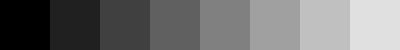

In [4]:
demo = np.array([[0, 1, 2, 3, 4, 5, 6, 7]])
Image.fromarray(make_init_img(demo))

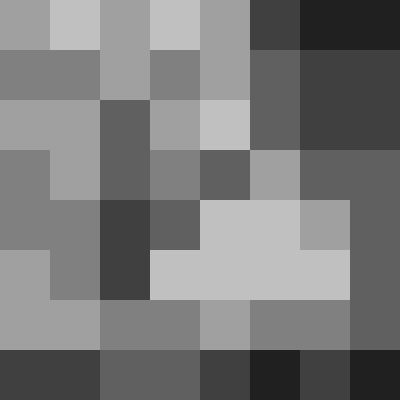

In [5]:
init = np.array([[5, 6, 5, 6, 5, 2, 1, 1],
                 [4, 4, 5, 4, 5, 3, 2, 2],
                 [5, 5, 3, 5, 6, 3, 2, 2],
                 [4, 5, 3, 4, 3, 5, 3, 3],
                 [4, 4, 2, 3, 6, 6, 5, 3],
                 [5, 4, 2, 6, 6, 6, 6, 3],
                 [5, 5, 4, 4, 5, 4, 4, 3],
                 [2, 2, 3, 3, 2, 1, 2, 1]])

img = make_init_img(init)
Image.fromarray(img)

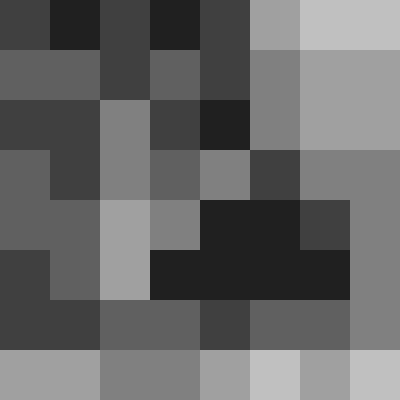

[[2 1 2 1 2 5 6 6]
 [3 3 2 3 2 4 5 5]
 [2 2 4 2 1 4 5 5]
 [3 2 4 3 4 2 4 4]
 [3 3 5 4 1 1 2 4]
 [2 3 5 1 1 1 1 4]
 [2 2 3 3 2 3 3 4]
 [5 5 4 4 5 6 5 6]]


In [6]:
negative = convert2negative(init)
display(Image.fromarray(make_init_img(negative)))
print(negative)

### Part B.

In [16]:
def bit_plane_sclicer(img, bits=3):
    print('Original')
    display(Image.fromarray(make_init_img(img)))
    planed = []
    for i, row in enumerate(img):
        for j, value in enumerate(row):
            planed.append(np.binary_repr(img[i, j], width=bits))
            
    for bit in range(bits):
        plane = (np.array([int(plane_bits[bits - bit - 1]) for plane_bits in planed], dtype=np.uint8)).reshape(img.shape)
        print('Bit plane {}'.format(bit + 1))
        display(Image.fromarray(make_init_img(plane, levels=1)))
        print(plane)
        print('\n\n')

Original


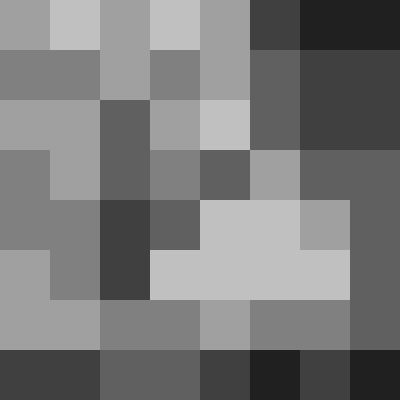

Bit plane 1


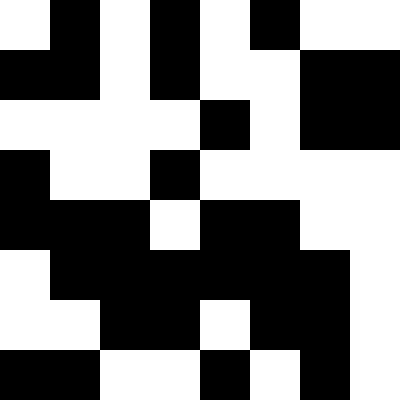

[[1 0 1 0 1 0 1 1]
 [0 0 1 0 1 1 0 0]
 [1 1 1 1 0 1 0 0]
 [0 1 1 0 1 1 1 1]
 [0 0 0 1 0 0 1 1]
 [1 0 0 0 0 0 0 1]
 [1 1 0 0 1 0 0 1]
 [0 0 1 1 0 1 0 1]]



Bit plane 2


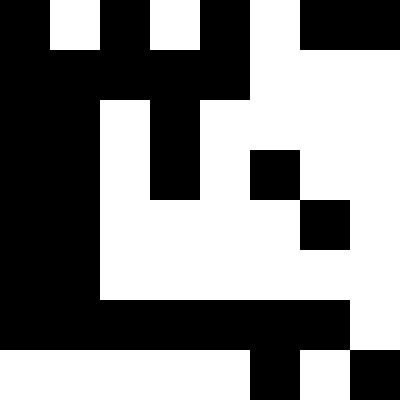

[[0 1 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 1 0 1 1 1 1]
 [0 0 1 0 1 0 1 1]
 [0 0 1 1 1 1 0 1]
 [0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 1 0]]



Bit plane 3


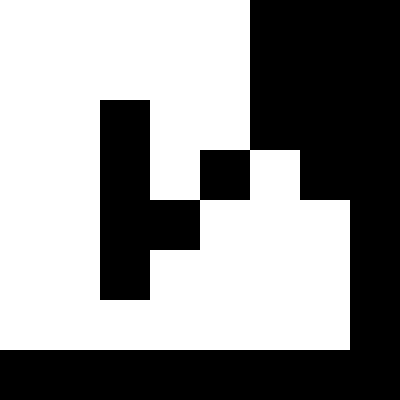

[[1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 0 1 1 0 0 0]
 [1 1 0 1 0 1 0 0]
 [1 1 0 0 1 1 1 0]
 [1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0]]





In [17]:
bit_plane_sclicer(init)

### Part C.

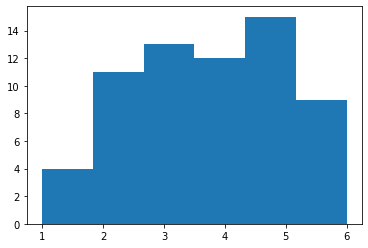

In [11]:
plt.hist(init.reshape(-1), bins=6)
plt.show()

### Part D.

In [12]:
valley = 4

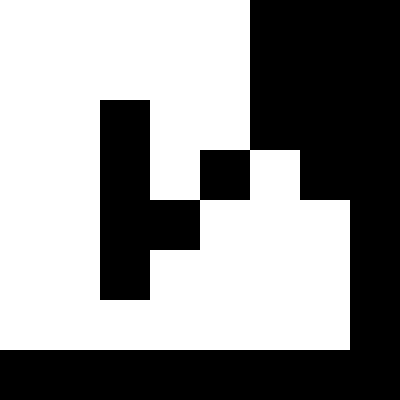

[[1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 0 1 1 0 0 0]
 [1 1 0 1 0 1 0 0]
 [1 1 0 0 1 1 1 0]
 [1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0]]


In [13]:
for i, row in enumerate(init):
    for j, value in enumerate(row):
        thresholded = np.array([0 if x < valley else 1 for x in init.reshape(-1)]).reshape(init.shape)
display(Image.fromarray(make_init_img(thresholded, levels=1)))
print(thresholded)

### Part E.

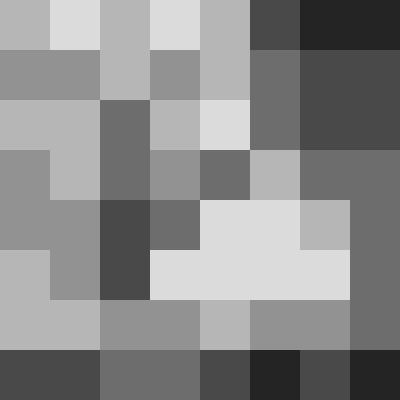

[[182 219 182 219 182  73  36  36]
 [146 146 182 146 182 109  73  73]
 [182 182 109 182 219 109  73  73]
 [146 182 109 146 109 182 109 109]
 [146 146  73 109 219 219 182 109]
 [182 146  73 219 219 219 219 109]
 [182 182 146 146 182 146 146 109]
 [ 73  73 109 109  73  36  73  36]]


In [14]:
nmin, nmax = 0, 255
omin, omax = 0, 7

space = (nmax - nmin) / (omax - omin)

scales = []
for i in range(8):
    scales.append(round(nmin + (i * space)))
    
scaled = np.zeros(init.shape).astype(np.uint8)
for i, row in enumerate(init):
    for j, value in enumerate(row):
         scaled[i, j] = scales[value]

display(Image.fromarray(make_init_img(scaled, levels=256)))
print(scaled)

### Part F.

0.0 0.0 0
0.0625 0.0625 0
0.171875 0.234375 2
0.203125 0.4375 3
0.1875 0.625 4
0.234375 0.859375 6
0.140625 1.0 7
0.0 1.0 7


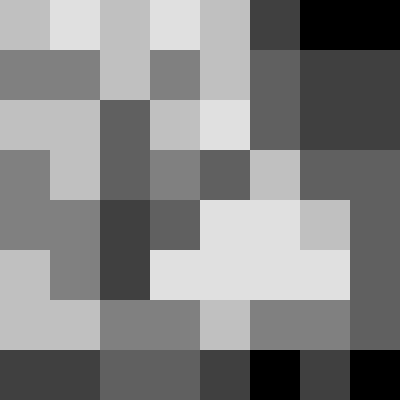

[[6 7 6 7 6 2 0 0]
 [4 4 6 4 6 3 2 2]
 [6 6 3 6 7 3 2 2]
 [4 6 3 4 3 6 3 3]
 [4 4 2 3 7 7 6 3]
 [6 4 2 7 7 7 7 3]
 [6 6 4 4 6 4 4 3]
 [2 2 3 3 2 0 2 0]]


In [15]:
s = 0
equs = []
for i in range(8):
    temp = list(init.reshape(-1)).count(i) / 64
    s += temp
    equ = round(s * 7)
    equs.append(equ)
    print(temp, s, equ)

equalized = init.copy()
for i, row in enumerate(init):
    for j, value in enumerate(row):
        equalized[i, j] = equs[value]

display(Image.fromarray(make_init_img(equalized)))
print(equalized)